In [4]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('/kaggle/input/maize-disease-model/tensorflow2/v3/1/maize_model_v3.keras')

In [6]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/maize-leaf-disease/test_set',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # Ensure these match the model's expected input
    batch_size=BATCH_SIZE,
    shuffle=False)  # Important for matching the predictions to labels

Found 5125 files belonging to 7 classes.


In [7]:
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

# Predict labels
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability


I0000 00:00:1713650398.669415      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-04-20 21:59:58.678786: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


161/161 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.9540 - loss: 0.1916
Test Accuracy: 0.916292667388916, Test Loss: 0.3687063753604889
161/161 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step


In [8]:
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

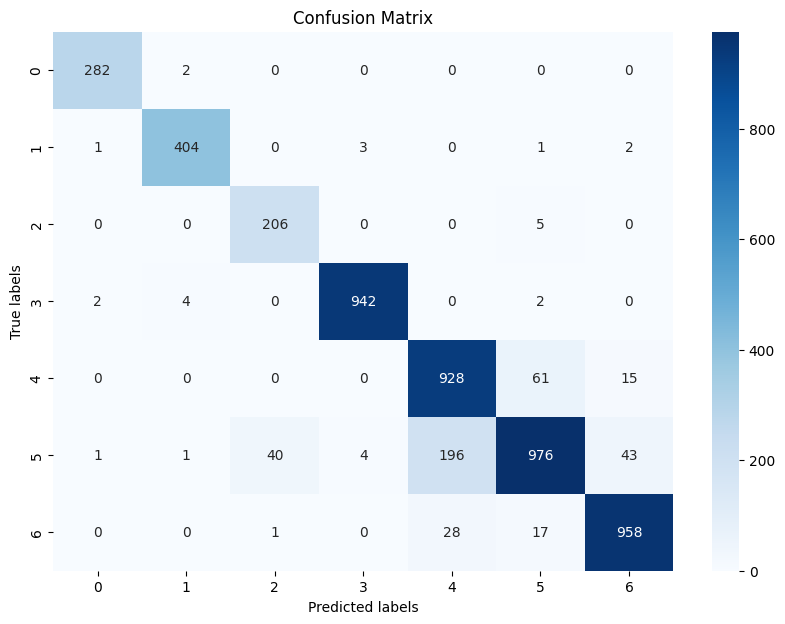

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
